# Machine Learning 

In [1]:
import numpy as np
import pandas as pd
import scipy.io
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

The key to this classification task is to discriminate between happy and mad faces. What features do we pay attention to? The eyes, the mouth, maybe the brow? The image below depicts a set of points that can be automatically detected in a face image. The distances between pairs of these points can indicate the facial expression, such as a smile or a frown.

<img src="face.png" alt="Drawing" style="width: 300px;"/>

$y$ can take two values:
$$y = \left\{\begin{matrix}
 +1 & if & happy \\ 
 -1&  if & mad 
\end{matrix}\right.$$

## Supervised Learning: Classification with Least Squares

In [2]:
def load_data():
    '''
    Loads face emotion data
    '''
    mat = scipy.io.loadmat('face_emotion_data.mat')
    X = mat['X']
    y = mat['y'][:, 0]

    print('X shape:', X.shape)
    print('Y shape:', y.shape)
    
    return X, y

X, y = load_data()

X shape: (128, 9)
Y shape: (128,)


In [3]:
y

array([-1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1], dtype=int16)

In [4]:
def split_data(X, y, test_size):
    '''
    Splits the data and returns a trainning set and a testing set
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    print('X train shape', X_train.shape)
    print('X test shape', X_test.shape)
    print('y train shape', y_train.shape)
    print('y test shape', y_test.shape)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y, 0.20)

X train shape (102, 9)
X test shape (26, 9)
y train shape (102,)
y test shape (26,)


In [5]:
def linear_reg(X_train, y_train, X_test):
    '''
    Uses training data to fit the model and returns the model and the predicted labels
    of testing data
    '''
    
    # Fit the linear regression
    model = LinearRegression(fit_intercept=False)

    # Train the model using the training set
    results = model.fit(X_train, y_train)

    # Make predictions using the testing set
    pred = results.predict(X_test)
    
    return results, pred

results, pred = linear_reg(X_train, y_train, X_test)
pred

array([ 1.06262474, -0.31241336, -1.13044119, -0.25054852,  0.21318596,
       -0.79381475,  0.69805221, -1.47933662,  0.61278459,  0.54298434,
       -0.96067365, -0.97640286, -1.0629928 ,  0.53749234, -0.70285874,
       -1.34228012,  0.5359934 , -0.58878021,  0.86112487, -1.6971476 ,
        1.05558932,  0.53890229,  0.64140918, -1.26942775, -0.79203037,
        0.77985217])

Since our predictions are continuous we need to use a classification rule. The predicted label is going to be the sign of the predicted value:

$$\widetilde{y} = sign(\hat{y})$$

In [6]:
y_pred = np.sign(pred)
y_pred

array([ 1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,
        1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.])

$$accuracy\_score = \frac{correct\_predictions}{total\_predictions}$$

In [7]:
#acc_score = 1 - ((y_pred != y_test).sum() / 26)
print('accuracy score LS with 9 features:', accuracy_score(y_pred, y_test))

accuracy score LS with 9 features: 0.9615384615384616


### Feature importance

Choose the two best predictors and repeat the analysis

In [8]:
weights = results.coef_
weights

array([ 0.97542636,  0.08915081,  0.20187341, -0.20725856, -0.05178832,
        0.01869011, -0.17760485, -0.12846611, -0.16805808])

In [9]:
def get_best_features(weights, num_features):
    '''
    Returns n features with larger weights in absolute value
    '''
    weights_ordered = np.absolute(weights).argsort()[::-1]
    return weights_ordered[0:num_features]

best_features = get_best_features(weights, 2)
best_features

array([0, 3])

In [10]:
X_train_small = X_train[:, best_features]
X_test_small = X_test[:, best_features]
print('X train shape', X_train_small.shape)
print('X test shape', X_test_small.shape)

X train shape (102, 2)
X test shape (26, 2)


In [11]:
model, labels_small = linear_reg(X_train_small, y_train, X_test_small)
y_pred_small = np.sign(labels_small)
weights_small = model.coef_
print('accuracy score LS with 2 features', accuracy_score(y_pred_small, y_test))

accuracy score LS with 2 features 0.9230769230769231


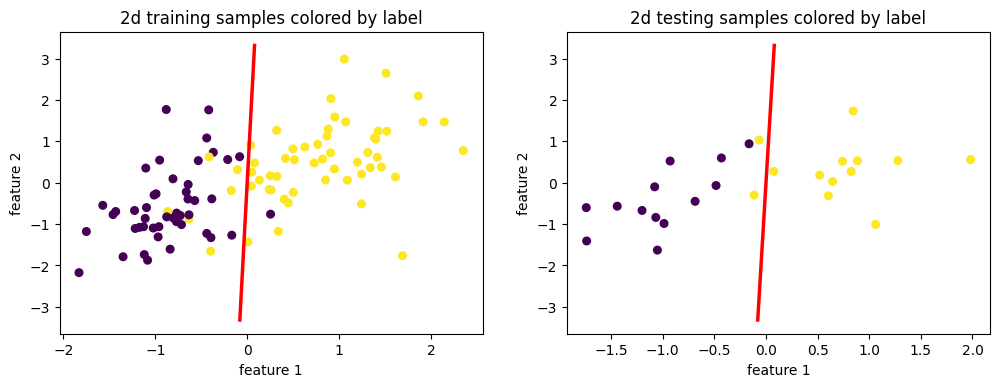

In [12]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax1, ax2 = ax

ax1.scatter(X_train_small[:,0], X_train_small[:, 1], 30, c=y_train)
x1 = np.linspace(-0.08, 0.08, 500)
ax1.plot(x1, -x1*weights_small[0]/weights_small[1], 'r', linewidth=2.5)
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('2d training samples colored by label')

ax2.scatter(X_test_small[:,0], X_test_small[:, 1], 30, c=y_test)
x2 = np.linspace(-0.08, 0.08, 500)
ax2.plot(x2, -x2*weights_small[0]/weights_small[1], 'r', linewidth=2.5)
ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
ax2.set_title('2d testing samples colored by label')
plt.show()

## Supervised Learning: Desicion Tree

We want to build a tree with a set of hierarchical decisions which eventually give us the final label, i.e our classification or regression prediction. The decisions will be selected such that the tree is as small as possible while aiming for high classification accuracy.
For example, we can classify animals based on whether they can fly, have feathers and have finns.

<img src="dt.png" alt="Drawing" style="width:400px;"/>

Let's use a desicion tree to predict weather a face is smiling or not.

In [13]:
def dt(X_train, y_train, X_test):
    '''
    Uses a dt model and returns the predicted labels
    '''
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    y_pred_tree = clf.predict(X_test)
    
    return clf, y_pred_tree

model_dt, y_pred_dt = dt(X_train, y_train, X_test)

In [14]:
print('accuracy score desicion tree:', accuracy_score(y_pred_dt, y_test))

accuracy score desicion tree: 1.0


## Unsupervised Learning: Dimensionality Reduction using PCA

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

<img src="PCA.png" alt="Drawing" style="width: 400px;"/>

In [15]:
def pca(X, n_features):
    '''
    Takes n features and returns data with fewer dimensions
    '''
    model = PCA(n_components=n_features)
    model.fit(X)
    X_D = model.transform(X)
    print(X_D.shape)
    return X_D

X_2D = pca(X, 2)

(128, 2)


Make predictions using LS

In [16]:
X_train_2D, X_test_2D, y_train, y_test = split_data(X_2D, y, 0.20)

X train shape (102, 2)
X test shape (26, 2)
y train shape (102,)
y test shape (26,)


In [17]:
model_2D, labels_2D = linear_reg(X_train_2D, y_train, X_test_2D)
y_pred_2D = np.sign(labels_2D)
weights_2D = model_2D.coef_
print('accuracy score LS after dim reduction (2 features):', accuracy_score(y_pred_2D, y_test))

accuracy score LS after dim reduction (2 features): 0.8461538461538461


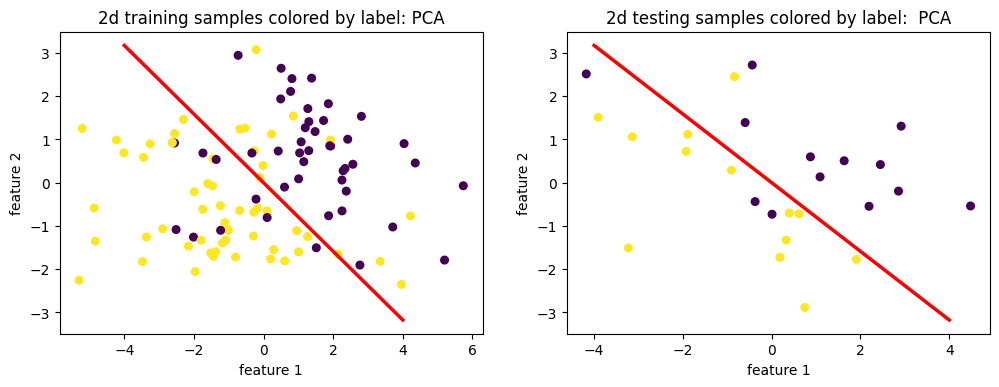

In [18]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax1, ax2 = ax

ax1.scatter(X_train_2D[:,0], X_train_2D[:, 1], 30, c=y_train)
x1 = np.linspace(-4, 4, 500)
ax1.plot(x1, -x1*weights_2D[0]/weights_2D[1], 'r', linewidth=2.5)
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('2d training samples colored by label: PCA')

ax2.scatter(X_test_2D[:,0], X_test_2D[:, 1], 30, c=y_test)
x2 = np.linspace(-4, 4, 500)
ax2.plot(x2, -x2*weights_2D[0]/weights_2D[1], 'r', linewidth=2.5)
ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
ax2.set_title('2d testing samples colored by label:  PCA')
plt.show()

## Unsupervised Learning: Clustering with K-Means

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [19]:
def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    pred_labels = kmeans.labels_
    
    return kmeans, pred_labels

kmeans_model, kmeans_labels = k_means(X_2D, 2)

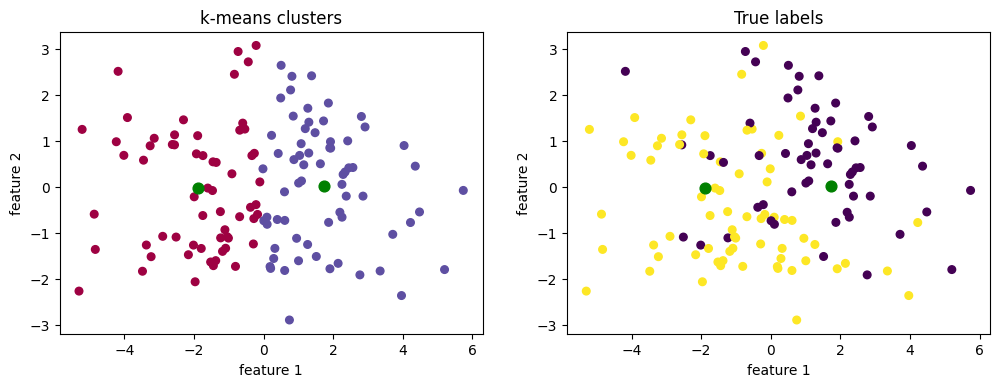

In [20]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax1, ax2 = ax

ax1.scatter(X_2D[:,0], X_2D[:, 1], 30, c=kmeans_labels, cmap='Spectral')
ax1.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:, 1], 60, c='green')
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('k-means clusters')

ax2.scatter(X_2D[:,0], X_2D[:, 1], 30, c=y)
ax2.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:, 1], 60, c='green')
ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
ax2.set_title('True labels')
plt.show()